In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [28]:
mnist_train = np.load('data/mnist_train.npy')
X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
mnist_test = np.load('data/mnist_test.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

In [29]:
awgn_images = np.load('data/awgn_images.npy')
awgn_images = awgn_images.reshape(100, 10, 28, 28, 1)

noisy_X = np.load('data/awgn_X.npy')
noisy_y = np.load('data/awgn_y.npy')
print(awgn_images.shape)
print(noisy_y.shape)
noisy_res = np.load('predictions/awgn.npy')

(100, 10, 28, 28, 1)
(100,)


In [30]:
# fig = plt.figure()
# for i in range(10):
#     for j in range(10):
#         k = i * 10 + j
#         ax = fig.add_subplot(10, 10, k+1)
#         ax.imshow(awgn_images[i][j].reshape(28,28), cmap=plt.cm.gray_r)
#         ax.set_xticks([])
#         ax.set_yticks([])        

0 0.9403720912345833 0.05607242126167977 0.059627908765416626
1 0.8995028553623734 0.09039746855731057 0.10049714463762661
2 0.8437052364322819 0.1318667104490292 0.1562947635677181
3 0.8294544191180611 0.14145978572358098 0.17054558088193897
4 0.7990999668653501 0.16053920982114644 0.20090003313464985
5 0.7491821406070545 0.18790826080248613 0.25081785939294554
6 0.6590713974340502 0.22469629051837847 0.34092860256594987
7 0.5871654135078721 0.24240219068800167 0.4128345864921279
8 0.5377423554974784 0.24857551460150196 0.4622576445025216
9 0.44857324885287264 0.24735528926645142 0.5514267511471274
6


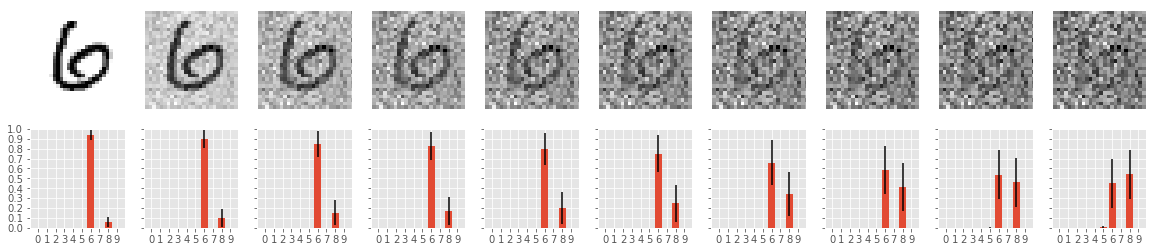

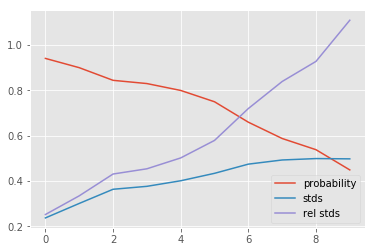

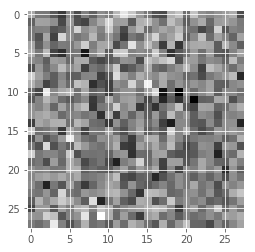

In [51]:
# indexes that work well: 1, 11 very well
index = 11
correct_class = noisy_y[index]
noisy_p,noisy_var = noisy_res[index]
noisy_images = awgn_images[index]
num_images = 10

# fig = plt.figure(figsize=(20, 4))
f, axes = plt.subplots(nrows=2, ncols=10, figsize=(20,4), sharey='row')
for i in range(num_images):
    print(i, noisy_p[i][correct_class], noisy_var[i][correct_class], noisy_var[i][correct_class]/noisy_p[i][correct_class])
    ax = axes[0,i]
    noisy_image = noisy_images[i]
    
    ax.imshow(noisy_image.reshape(28,28), cmap=plt.cm.gray_r) 
    ax.set_xticks([])
    ax.set_yticks([])
    
#     ax2 = fig.add_subplot(2, num_images, i+1+num_images)
    ax2 = axes[1,i]
    ax2.bar(np.arange(10), noisy_p[i].squeeze(), yerr=noisy_var[i].squeeze())
    ax2.set_ylim([0,1])
    ax2.set_xticks(np.arange(10))
    ax2.set_yticks(np.linspace(0,1,11))
    
print(correct_class)
probs = noisy_p[:,correct_class]
stds = np.sqrt(noisy_var[:,correct_class])
plt.savefig("figs/awgn_predictions.png", bbox_inches='tight')

plt.figure()
# plt.plot(np.arange(num_images), probs)
# plt.plot(np.arange(num_images), vars)
plt.plot(np.arange(num_images), probs, label="probability")
plt.plot(np.arange(num_images), stds, label="stds")
plt.plot(np.arange(num_images), stds/probs, label="rel stds")
plt.legend()
plt.savefig("figs/awgn_predictions_stds.png", bbox_inches='tight')

plt.figure()
plt.imshow(noisy_images[-1].reshape(28,28), cmap=plt.cm.gray_r) 